
# 🧫 Introduction to **R** in Bioinformatics

This notebook provides a concise, hands‑on introduction to using **R** for bioinformatics — with a focus on the **Bioconductor** ecosystem.

You will see how R is commonly used for:
- **Data analysis and visualization** (ggplot2, tidyverse)
- **High‑throughput genomics workflows** (RNA‑seq, microarrays)
- **Statistical modeling** and reproducible reporting
- Working with Bioconductor data structures (e.g., `SummarizedExperiment`)

> **Goal:** Give you a practical starting point to run a real bioinformatics analysis end‑to‑end in R.


> **Scope of this notebook**
>
> This notebook is not a full RNA-seq tutorial.
> It is a conceptual and practical introduction to how **R and Bioconductor**
> are used in real bioinformatics workflows, using RNA-seq differential expression
> as a motivating example.
>
> Many steps (e.g. read alignment, quantification) are assumed to be already done.



### 🧭 Why R is widely used in bioinformatics (intuition first)

Modern bioinformatics is **statistics-heavy by nature**.

Most biological questions are not about writing complex software,
but about:
- comparing groups
- quantifying uncertainty
- modeling noisy, high-dimensional data
- interpreting results statistically

R became popular in biology because it was **designed for statistics first**,
not as a general-purpose programming language.



## 📦 What is Bioconductor?

Bioconductor is an open-source ecosystem built on top of R for the
**analysis and interpretation of high-throughput biological data**.

While R provides generic data structures (vectors, matrices, data frames),
Bioconductor extends R with:

- domain-specific data containers for genomics
- standardized workflows for sequencing data
- statistically rigorous and peer-reviewed methods
- strong guarantees about reproducibility and metadata consistency

Bioconductor was launched in 2001 and has since become the
**de facto standard platform for genomic data analysis in R**.


### 🔍 Why Bioconductor exists

Modern biological experiments generate data that are:
- large (thousands of genes, millions of reads)
- structured (counts, annotations, metadata)
- noisy and statistically complex

Generic data frames are often not enough to handle this complexity.

Bioconductor solves this by providing **specialized data containers** and **analysis pipelines** that encode biological meaning directly into the data structure.



### 🧩 SummarizedExperiment (core Bioconductor data structure)

SummarizedExperiment is a standardized container for sequencing-based assays
such as RNA-seq or ChIP-seq.

It stores:

- `assay`: numeric matrix (e.g. gene expression counts)
- `rowData`: feature-level metadata (genes, transcripts)
- `colData`: sample-level metadata (conditions, batches)

The key idea is that **data and metadata stay synchronized by design**.

If you subset samples or genes, all related metadata is updated automatically.
This greatly reduces common analysis mistakes.

Understanding SummarizedExperiment is essential:
most Bioconductor workflows build directly on this object.


### 🧠 How Bioconductor fits into a bioinformatics workflow

Bioconductor is primarily used in the **analysis and modeling stages** of bioinformatics workflows:

1. Data processing and organization  
2. Statistical modeling (e.g. differential expression)  
3. Visualization and interpretation  
4. Reproducible reporting  

Biopython and other Python tools often handle **data acquisition and preprocessing**,  
while Bioconductor focuses on **statistical analysis and interpretation**.


> **Take-home message:**  
> Bioconductor turns R into a specialized language for genomic data analysis,
> providing standardized data structures and statistically rigorous workflows.



## ✅ Setup


In [7]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
%%R
x <- c(1, 2, 3, 4)
mean(x)

[1] 2.5


In [11]:
%%R
options(repos = c(CRAN = "https://cloud.r-project.org"))

# ---- R: install packages (run once) ----
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# CRAN packages
install.packages(c("tidyverse", "ggplot2"))

# Bioconductor packages
BiocManager::install(c("DESeq2", "airway", "SummarizedExperiment"), update = FALSE, ask = FALSE)

sessionInfo()



The downloaded binary packages are in
	/var/folders/xf/57vzbytd49j69z6nrhq2kbt00000gn/T//RtmpXTGEPf/downloaded_packages
R version 4.5.1 (2025-06-13)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.6.1

Matrix products: default
BLAS:   /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libBLAS.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.1

locale:
[1] C/UTF-8/C/C/C/C

time zone: Asia/Tehran
tzcode source: internal

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

loaded via a namespace (and not attached):
[1] BiocManager_1.30.27 compiler_4.5.1     


trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/tidyverse_2.0.0.tgz'
trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/ggplot2_4.0.1.tgz'
Warning in download.packages(pkgs, destdir = tmpd, available = available,  :
  download of package ‘ggplot2’ failed
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org
Bioconductor version 3.21 (BiocManager 1.30.27), R 4.5.1 (2025-06-13)



## 🧩 Core idea: Bioconductor data objects

Many Bioconductor workflows revolve around standardized data containers.

### `SummarizedExperiment`
A common structure for sequencing‑based assays:
- **assay**: counts / expression matrix
- **rowData**: gene metadata
- **colData**: sample metadata


In [12]:
%%R

# ---- R: load example dataset ----
suppressPackageStartupMessages({
  library(airway)
  library(SummarizedExperiment)
})

data(airway)
se <- airway
se


class: RangedSummarizedExperiment 
dim: 63677 8 
metadata(1): ''
assays(1): counts
rownames(63677): ENSG00000000003 ENSG00000000005 ... ENSG00000273492
  ENSG00000273493
rowData names(10): gene_id gene_name ... seq_coord_system symbol
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(9): SampleName cell ... Sample BioSample



### Inspect the data

You typically check:
- how many genes and samples you have
- sample groups / conditions
- whether counts look reasonable


In [13]:
%%R

# ---- R: quick inspection ----
dim(se)                 # genes x samples
head(colData(se))       # sample metadata
head(rowData(se))       # gene metadata

# counts matrix
cts <- assay(se)
cts[1:5, 1:4]


                SRR1039508 SRR1039509 SRR1039512 SRR1039513
ENSG00000000003        679        448        873        408
ENSG00000000005          0          0          0          0
ENSG00000000419        467        515        621        365
ENSG00000000457        260        211        263        164
ENSG00000000460         60         55         40         35



## 🎯 Mini workflow: Differential Expression (RNA‑seq) with **DESeq2**

### Important note (educational disclaimer)

This notebook demonstrates a **minimal, educational RNA-seq workflow**.

It is intended to illustrate:
- data structures
- typical analysis steps
- interpretation of results

It is **not** a fully optimized or publication-ready pipeline.

Topics such as:
- experimental design
- batch effects
- replicate structure
- covariates

are intentionally simplified or omitted for clarity.

This is one of the most common real‑world reasons R is used in bioinformatics.

### What DESeq2 does (in plain language)
- Models read counts using a **negative binomial** distribution
- Normalizes for library size
- Estimates dispersion
- Tests each gene for differential expression between conditions


In [14]:
%%R

suppressPackageStartupMessages({
  library(DESeq2)
})

# Ensure the treatment/control factor is set correctly
colData(se)$dex <- relevel(colData(se)$dex, "untrt")

dds <- DESeqDataSet(se, design = ~ dex)

# Filter out very low-count genes (practical step)
dds <- dds[rowSums(counts(dds)) > 10, ]

dds <- DESeq(dds)
res <- results(dds, contrast = c("dex", "trt", "untrt"))

# Sort by adjusted p-value (FDR)
res <- res[order(res$padj), ]
head(res)


log2 fold change (MLE): dex trt vs untrt 
Wald test p-value: dex trt vs untrt 
DataFrame with 6 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat       pvalue
                <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSG00000152583   997.410        4.60253 0.2117604   21.7346 9.66025e-105
ENSG00000148175 11193.408        1.45147 0.0845138   17.1744  4.12879e-66
ENSG00000179094   776.573        3.18385 0.2014865   15.8018  3.02270e-56
ENSG00000134686  2737.917        1.38715 0.0913347   15.1876  4.27550e-52
ENSG00000125148  3656.161        2.20345 0.1472655   14.9624  1.29231e-50
ENSG00000120129  3408.961        2.94901 0.2015704   14.6302  1.80290e-48
                        padj
                   <numeric>
ENSG00000152583 1.75015e-100
ENSG00000148175  3.74007e-62
ENSG00000179094  1.82541e-52
ENSG00000134686  1.93648e-48
ENSG00000125148  4.68256e-47
ENSG00000120129  5.44386e-45


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing



### Interpreting DESeq2 results

Key columns in the results table:

- `log2FoldChange`: effect size (direction + magnitude)
- `pvalue`: raw statistical significance
- `padj`: adjusted p-value controlling false discovery rate (FDR)

A common practical rule of thumb:

- `padj < 0.05`
- `|log2FoldChange| ≥ 1`

This balances statistical confidence with biological relevance.


In [15]:
%%R

# ---- R: add a simple significance label ----
res_df <- as.data.frame(res)
res_df$gene_id <- rownames(res_df)

res_df$significant <- with(res_df, !is.na(padj) & padj < 0.05 & abs(log2FoldChange) >= 1)

table(res_df$significant, useNA = "ifany")



FALSE  TRUE 
21135   873 



## 📈 Visualization: MA plot and Volcano plot

### MA plot
- X axis: mean expression
- Y axis: log2 fold change
- Good for spotting systematic bias and effect sizes across expression levels

### Volcano plot
- X axis: log2 fold change
- Y axis: −log10(p-value)
- Highlights genes with large effects and strong evidence


### 🌋 Why volcano plots are useful

Volcano plots combine:
- effect size (log2 fold change)
- statistical evidence (p-value)

This allows quick identification of genes that are:
- strongly changed
- statistically reliable

They are especially useful for prioritizing candidates
for downstream biological interpretation.


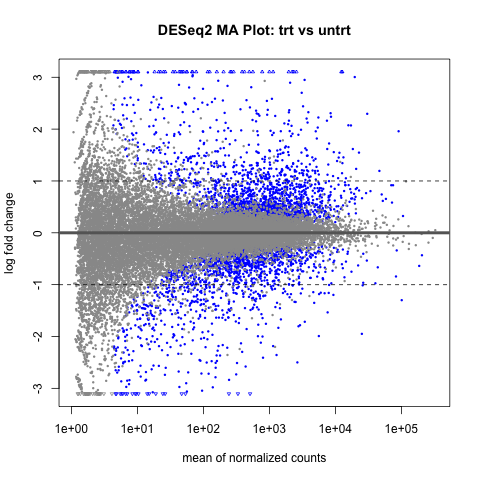

In [16]:
%%R

# ---- R: MA plot (built-in) ----
plotMA(res, main = "DESeq2 MA Plot: trt vs untrt")
abline(h = c(-1, 1), lty = 2)


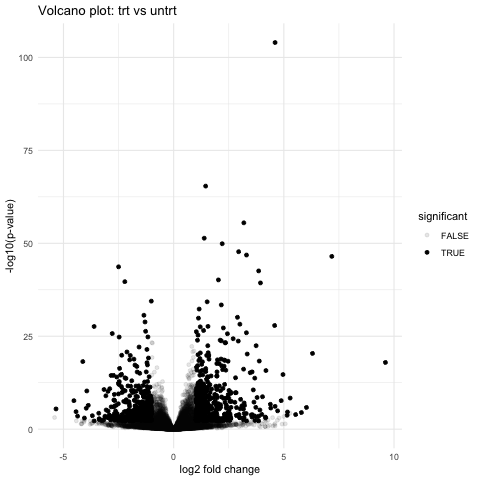

In [17]:
%%R

# ---- R: Volcano plot (ggplot2) ----
suppressPackageStartupMessages(library(ggplot2))

res_df$neglog10p <- -log10(res_df$pvalue)

ggplot(res_df, aes(x = log2FoldChange, y = neglog10p)) +
  geom_point(aes(alpha = significant)) +
  labs(
    title = "Volcano plot: trt vs untrt",
    x = "log2 fold change",
    y = "-log10(p-value)"
  ) +
  theme_minimal()



## 📤 Export results (so you can use them elsewhere)

A very common practice is to export a tidy table for:
- downstream plots
- pathway analysis
- reporting
- combining with Python workflows


In [18]:
%%R

# ---- R: write results to CSV ----
out_csv <- "deseq2_airway_results.csv"
write.csv(res_df, out_csv, row.names = FALSE)
cat("✅ Wrote:", out_csv, "\n")


✅ Wrote: deseq2_airway_results.csv 



## 🧰 Other common R/Bioconductor use cases (high-level)

- **Single-cell RNA-seq**: Seurat, SingleCellExperiment
- **Pathway / enrichment analysis**: fgsea, clusterProfiler (often needs annotation packages)
- **Genomic intervals**: GenomicRanges
- **Sequence utilities**: Biostrings
- **Visualization**: ggplot2, ComplexHeatmap
- **Reproducible reports**: R Markdown / Quarto



## 🚀 Easy project ideas (R-focused)

1. **DESeq2 report**: run DESeq2, generate MA + volcano + top genes table, export CSV and a short summary.
2. **QC dashboard**: plot library sizes, sample distances (PCA), and count distributions for an RNA‑seq dataset.
3. **GenomicRanges practice**: intersect peaks (ChIP-seq) with gene promoters and summarize overlaps.
4. **Heatmap mini-project**: visualize top 50 DE genes using a clustered heatmap.



### Summary

- R is a core language in bioinformatics because many workflows are
  statistical and genomics-oriented.
- Bioconductor turns R into a **specialized platform for genomic data analysis**.
- Standardized dataata structures (e.g. SummarizedExperiment) are central.
- This notebook demonstrated a real end-to-end RNA-seq differential expression workflow:
  dataset → model → results → visualization → export.

If Biopython helps you **handle biological data**,
Bioconductor helps you **understand it statistically**.
taset → DESeq2 → results table → MA/volcano plots → export.

## 🔗 References & Acknowledgment

- Bioconductor project:
  https://www.bioconductor.org/
- DESeq2 paper (Love, Huber, Anders):  
  https://genomebiology.biomedcentral.com/articles/10.1186/s13059-014-0550-8
- airway dataset (Bioconductor):  
  https://bioconductor.org/packages/release/data/experiment/html/airway.html
- SummarizedExperiment documentation:  
  https://bioconductor.org/packages/SummarizedExperiment/
- Bioconductor workflows and vignettes:  
  https://bioconductor.org/help/workflows/

